<a href="https://colab.research.google.com/github/JoaoCuri/pequenos_desafios/blob/master/Regress%C3%A3o_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão logistica**

Diferente da regressão linear que usamos variáveis numéricas para predizer valores de uma observação a regressão logistica podemos predizer a categoria de observação.

Casos que podemos utilizar a regressão logistica:

* Analise de propensão de vendas x gastos com propaganda.
* Predição de rotatividade de clientes.
* Predição de eventos perigosos.


Pressupostos para trabalhar com a regressão logistica

1. O conjunto de dados não apresenta valores em branco
2. A variável predita é binária( só aceita 2 possibilidades de valores ) ou ordinal (variável categórica com valores ordenados.
3. Todas as variáveis preditoras são independentes.
4. Existem pelo menos 50 observações por variáveis preditora (para garantir resultados confiáveis).



 ***aplicando***

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

from scipy.stats import spearmanr
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

carros = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
carros.head()



,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


**Regressão logistica em mtcars**





In [2]:
carros_colunas = ['drat','carb']
carros_dados = carros[carros_colunas].values

y = carros['am'].values

**checando se as variáveis são categóricas**

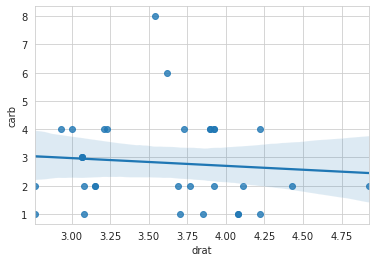

In [3]:
sns.regplot(x='drat',y = 'carb',data = carros,scatter=True);

pelo comportamento podemos verificar que são categóricas

**Checando se são independentes**

In [4]:
drat = carros['drat']
carb = carros['carb']

spearmanr,p = spearmanr(drat,carb)
print(spearmanr)

-0.1252229399201802


Quando o coeficiente de spearmanr for bem pórximo de zero podemos concluir que são indepententes.

**conferindo se temos valores nulos**

In [6]:
carros.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

**conferindo se o target é binário ou ordinal**

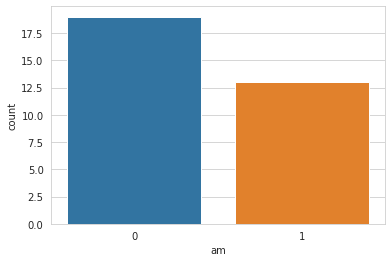

In [9]:
sns.countplot(x='am',data= carros);

**Conferindo se o dado é grande o suficiente**

In [10]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


Tem que ter pelo menos 50, e nosso dataset tem apenas 32, como é apenas para estudo vamos continuar como se tivesse mais de 50 observações.

**Deploying and evaluating your model**

In [11]:
X = scale(carros_dados)

In [13]:
reg_log = LogisticRegression().fit(X,y)
print(reg_log.score(X,y))

0.8125


In [14]:
y_predito = reg_log.predict(X)
print(classification_report(y,y_predito))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32

